# Exploratory Data Analysis of Comic Book Characters
This notebook reads the processed data and generates images and tables to be used in further analysis. 

## Predict Question
What are the most important features in determining a comic book characters' alignment? How are they changing over time?

## Package Installation

First, install necessary packages by the following code block. 

In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import altair as alt
# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [2]:
# Retrieve the data set
df = pd.read_csv("../data/processed/clean_characters.csv", index_col = 0)
df.head()

,id,align,eye,hair,sex,gsm,appearances,first_appearance,year,publisher,first_name,last_name
name,,,,,,,,,,,,
Spider-Man (Peter Parker),Secret Identity,Good,Hazel,Brown,Male,NaN,4043.0,1962-08-01,1962.0,marvel,spider-man,NaN
Captain America (Steven Rogers),Public Identity,Good,Blue,White,Male,NaN,3360.0,1941-03-01,1941.0,marvel,captain,america
"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral,Blue,Black,Male,NaN,3061.0,1974-10-01,1974.0,marvel,wolverine,NaN
"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good,Blue,Black,Male,NaN,2961.0,1963-03-01,1963.0,marvel,iron,man
Thor (Thor Odinson),No Dual Identity,Good,Blue,Blond,Male,NaN,2258.0,1950-11-01,1950.0,marvel,thor,NaN


## Overview of the Data 
The dataset, we are going to use in the project is based on the features of [comic book characters](https://github.com/rudeboybert/fivethirtyeight/tree/master/data-raw/comic-characters) from [Marvel Wikia](https://marvel.fandom.com/wiki/Marvel_Database) and [DC Wikia](https://dc.fandom.com/wiki/DC_Comics_Database). 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23272 entries, Spider-Man (Peter Parker) to Mookie (New Earth)
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                17489 non-null  object 
 1   align             19859 non-null  object 
 2   eye               9877 non-null   object 
 3   hair              16734 non-null  object 
 4   sex               22293 non-null  object 
 5   gsm               154 non-null    object 
 6   appearances       21821 non-null  float64
 7   first_appearance  22242 non-null  object 
 8   year              22388 non-null  float64
 9   publisher         23272 non-null  object 
 10  first_name        23269 non-null  object 
 11  last_name         14442 non-null  object 
dtypes: float64(2), object(10)
memory usage: 2.3+ MB


There are 23272 observations and 11 columns in the dataset, with many null values on columns `gsm` and `eye`. The number of apperances is the only numerical feature in our dataset, and it has the following statistics.

In [4]:
df.describe(include="all")

,id,align,eye,hair,sex,gsm,appearances,first_appearance,year,publisher,first_name,last_name
count,17489,19859,9877,16734,22293,154,21821.000000,22242,22388.000000,23272,23269,14442
unique,5,3,24,27,6,6,NaN,879,NaN,2,11681,8127
top,Secret Identity,Bad,Blue,Black,Male,Homosexual,NaN,2006-09-01,NaN,marvel,john,ii
freq,8683,9615,3064,5329,16421,120,NaN,103,NaN,16376,150,124
mean,NaN,NaN,NaN,NaN,NaN,NaN,19.009303,NaN,1986.420046,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,93.814040,NaN,18.972698,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1935.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1976.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,1990.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,NaN,2001.000000,NaN,NaN,NaN


## Data Overview: Features vs Target 
The profile report from pandas_profiling would give a general idea about the features and target. 

In [5]:
pos_profile = ProfileReport(df, title="Pandas Profiling Report")
pos_profile.to_notebook_iframe()

In [6]:
pos_profile.to_file("eda_profile_report.html")

## What is the relation between `align` and other features
The comparison scatter plots are given between features vs `align`. The first appearance is quite the same as column year, so for the visualization using `year` would be enough. Taking these features as list, 

In [7]:
features = ['id', 'eye', 'hair', 'sex', 'gsm', 'publisher']

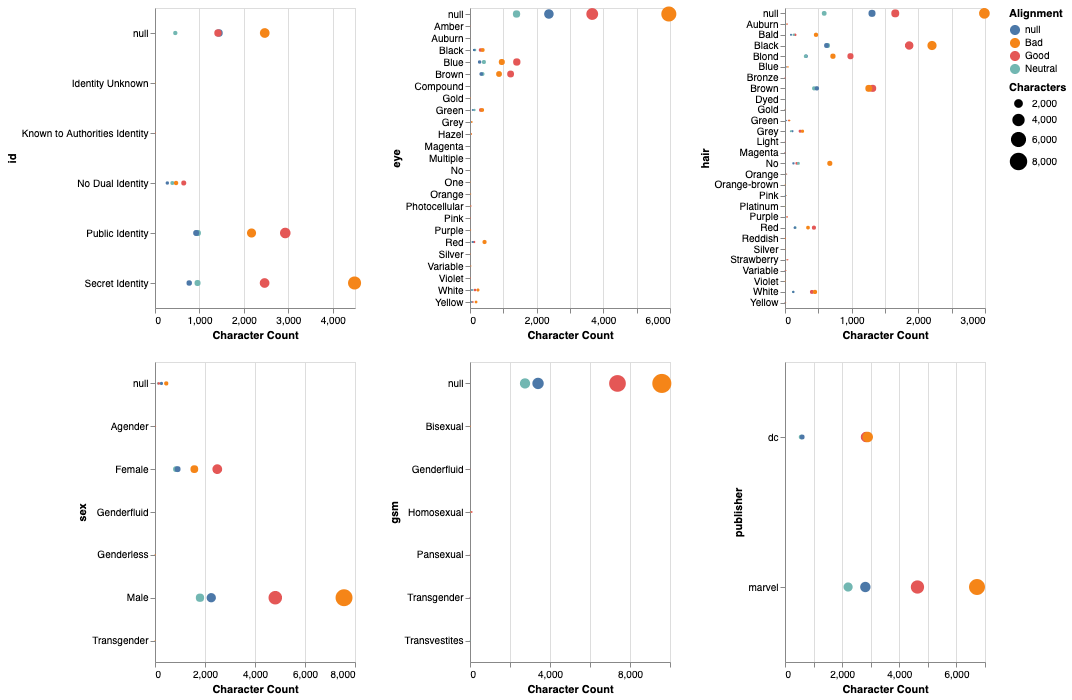

In [8]:
eda_features_vs_align = (alt.Chart(df).mark_circle().encode(
    alt.Y(alt.repeat(), type='ordinal'),
    alt.X('count()', title = "Character Count"),
    size =alt.Size('count()', legend=alt.Legend(title="Characters")),
    color = alt.Color("align", legend=alt.Legend(title="Alignment")))
 .properties(height=300, width=200)
 .repeat(repeat=features, columns=3)
)
eda_features_vs_align

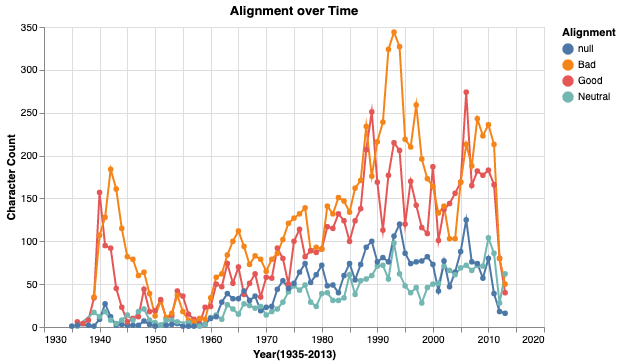

In [22]:
eda_year_vs_align = (alt.Chart(df, title = "Alignment over Time").mark_line().encode(
    alt.X('year', title = 'Year(1935-2013)', axis=alt.Axis(format='t')),
    y = alt.Y('count()', title = "Character Count"),
    color = alt.Color("align", title="Alignment"),
    tooltip = 'year')
    .properties(height=300, width=500))
eda_year_vs_align + eda_year_vs_align.mark_circle()

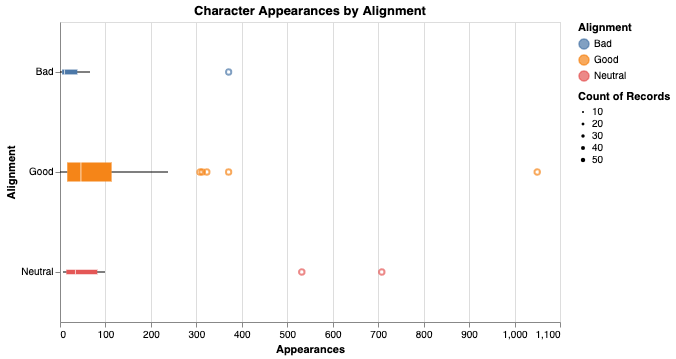

In [10]:
df_clean = df.dropna()
eda_appearances_vs_align = (
alt.Chart(df_clean, title="Character Appearances by Alignment").mark_boxplot().encode(
    alt.X('appearances:Q', title = 'Appearances'),
    y = alt.Y('align:O', title = "Alignment"),
    color = alt.Color("align", title = "Alignment"),
    size='count()'
).properties(height=300, width=500))
eda_appearances_vs_align

## Further questions to discuss
- How do we want to treat missing values, especially for the key features such as `eye` and `hair`?
- Shall we remove the missing values for align (i.e. our target column)?
- Go over the profile report to determine which features should be included in our analysis.